Ejercicio 1

1.- Escribe un código simple en python, para resolver la ecuación de movimiento de un péndulo simple utilizando la sintaxis básica, i.e cómo si fuera C/fortran  

In [55]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [58]:
import time 
start_time1 = time.time() 
angulo=0.03491
N=100
a=0.0
b=10.0
t=a
m=2
h=(b-a)*(N**(-1))
w=[angulo, 0.0]
k =np.zeros((4,4))
g = [None] * int(N+1)
for i in range(int(N+1)):
        g[i] = 0.0
r = [None] * int(N+1)
for i in range(int(N+1)):
        r[i] = 0.0
e = [None] * int(N+1)
for i in range(int(N+1)):
        e[i] = 0.0

funciones a usar del pendulo simple

In [59]:
def f1(tiempo, u1, u2):
        return u2

In [60]:
def f2(tiempo, u1, u2):
        g=9.8
        l=2.0
        return -g*(l**(-1))*math.sin(u1)

Método de Runge-Kutta a cuarto orden de Numerical Analisis, Burden

Aún no me familiarizo con la notación de python, por eso las funciones estan escrito raro, me parece ya se como corregirlo pero por ahora lo dejare así

In [61]:
for i in range(0, N+1, 1):
    #for j in range(0, m, 1):
                k[0,0]=h*f1(t, w[0], w[1])
                k[0,1]=h*f2(t, w[0], w[1])
        #for j in range(0, m, 1):
                k[1,0]=h*f1(t+(h*0.5), w[0]+(0.5*k[0,0]), w[1]+(0.5*k[0,1]))
                k[1,1]=h*f2(t+(h*0.5), w[0]+(0.5*k[0,0]), w[1]+(0.5*k[0,1]))
        #for j in range(0, m, 1):
                k[2,0]=h*f1(t+(h*0.5), w[0]+(0.5*k[1,0]), w[1]+(0.5*k[1,1]))
                k[2,1]=h*f2(t+(h*0.5), w[0]+(0.5*k[1,0]), w[1]+(0.5*k[1,1]))
        #for j in range(0, m, 1):
                k[3,0]=h*f1(t+h, w[0]+k[2,0], w[1]+k[2,1])
                k[3,1]=h*f2(t+h, w[0]+k[2,0], w[1]+k[2,1])
                
                w[0]=w[0]+(k[0,0]+2*k[1,0]+2*k[2,0]+k[3,0])*0.16666666666666666
                w[1]=w[1]+(k[0,1]+2*k[1,1]+2*k[2,1]+k[3,1])*0.16666666666666666
                g[i]=w[0]
                r[i]=w[1]
                e[i]=t
                
        #asignar t
                t=a+(i+1)*h
            
end_time1 = time.time()

Solución analítica para ángulos pequeños con ángulo inicial $\theta_{0}$,
$\theta =\theta_{0} \cos(\omega t)$,
con $\omega=\sqrt \frac{g}{l}$

In [62]:
def f2_(tiempo):
        g=9.8
        l=2.0
        return angulo*math.cos(tiempo*(math.sqrt(g*(l**(-1)))))

Lista de valores para la función analítica con el arreglo s y s_ como el tiempo

In [63]:
s=np.zeros((N+1), float)
s_=np.zeros((N+1), float)
for i in range(0, N+1, 1):
    s[i]=f2_(i*0.1)
    s_[i]=i*0.1


2.- Reescribe dicho código aprovechando el manejo de arreglos de numpy.

In [64]:
import time 

start_time2 = time.time()
NN=100
aN=0.0
bN=10.0
tN=aN
kN=np.zeros((4,4), float)
hN=0.1
wN=np.array([angulo, 0.0], dtype='float64')
gN=np.zeros((NN+1), float)
rN=np.zeros((NN+1), float)
eN=np.zeros((NN+1), float)

#print("--- %s seconds ---" % (time.time() - start_time2)) 

In [65]:
 
def f1(a, b, c):
        return c
def f2(a, b, c):
        g=9.8
        l=2.0
        return -g*(l**(-1))*math.sin(b)
ff1 = np.frompyfunc(f1, 3, 1)
ff2 = np.frompyfunc(f2, 3, 1)
p=np.arange(tN, NN+0.1, .1)
for i in range(0, NN+1, 1):
        #for j in range(0, m, 1):
        kN[0,0]=hN*ff1(p[i], wN[0], wN[1])
        kN[0,1]=hN*ff2(p[i], wN[0], wN[1])
        
        kN[1,0]=hN*ff1(p[i]+(hN*0.5), wN[0]+(0.5*kN[0,0]), wN[1]+(0.5*kN[0,1]))
        kN[1,1]=hN*ff2(p[i]+(hN*0.5), wN[0]+(0.5*kN[0,0]), wN[1]+(0.5*kN[0,1]))

        kN[2,0]=hN*ff1(p[i]+(hN*0.5), wN[0]+(0.5*kN[1,0]), wN[1]+(0.5*kN[1,1]))
        kN[2,1]=hN*ff2(p[i]+(hN*0.5), wN[0]+(0.5*kN[1,0]), wN[1]+(0.5*kN[1,1]))

        kN[3,0]=hN*ff1(p[i]+hN, wN[0]+kN[2,0], wN[1]+kN[2,1])
        kN[3,1]=hN*ff2(p[i]+hN, wN[0]+kN[2,0], wN[1]+kN[2,1])
                
        wN[0]=wN[0]+(kN[0,0]+2*kN[1,0]+2*kN[2,0]+kN[3,0])*0.16666666666666666
        wN[1]=wN[1]+(kN[0,1]+2*kN[1,1]+2*kN[2,1]+kN[3,1])*0.16666666666666666
        gN[i]=wN[0]
        rN[i]=wN[1]
end_time2 = time.time()


3.- En ambos casos muestra tus resultados usando tablas y gráficos. Compara los resultados, en terminos de los tiempos de ejecución. 
  Puedes elegir libremente los parámetros para el péndulo.

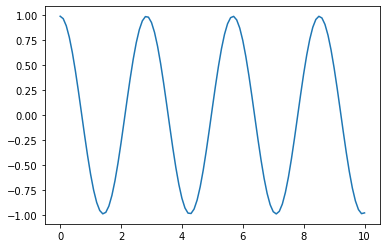

In [66]:
fig = plt.figure()
ax = plt.axes()
#funcion analitica
ax.plot(s_[:], s[:])

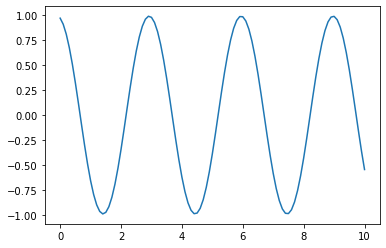

In [67]:
fig = plt.figure()
ax = plt.axes()
#simulacion sin numpy
ax.plot(e[:], g[:])

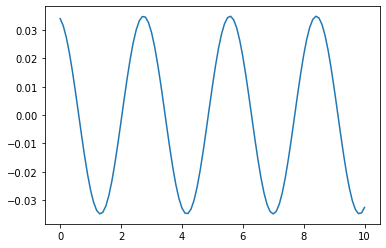

In [68]:
fig = plt.figure()
ax = plt.axes()
#simulacion con numpy
ax.plot(e[:], gN[:]);

Comparación de la función analitica, la aproximación con numpy y sin numpy

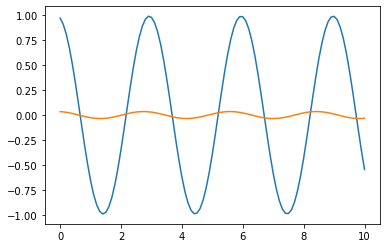

In [70]:
fig = plt.figure()
ax = plt.axes()
#funcion analitica
ax.plot(s_[:], s[:])
#simulacion sin numpy
ax.plot(e[:], g[:])
#simulacion con numpy
ax.plot(e[:], gN[:]);

El tiempo que toma a cada código:

In [15]:
print(" %s segundos con numpy ---" % (end_time2 - start_time2), "%s segundos sin numpy" % (end_time1 - start_time1))

 0.48322415351867676 segundos con numpy --- 2.5074267387390137 segundos sin numpy


In [16]:
import pandas as pd
from IPython.display import display
#pd.options.display.max_rows = 10
# Conversión a DataFrame

# Resultado


In [19]:
df = pd.DataFrame({ "tiempo": e, "con ciclos": g, "con numpy": gN})

Comando para aumentar los renglones a mostrar en la tabla el cual no puedo hacer funcionar

In [23]:
pd.set_option('max_rows', 200)

In [24]:
pd.get_option("display.max_rows")

200

In [25]:
df.head()

,tiempo,con ciclos,con numpy
0,0.0,0.034058,0.034058
1,0.1,0.031545,0.031545
2,0.2,0.027493,0.027493
3,0.3,0.022099,0.022099
4,0.4,0.015627,0.015627


In [39]:
df.head()

,tiempo,con ciclos,con numpy
0,0.0,0.034058,0.034058
1,0.1,0.031545,0.031545
2,0.2,0.027493,0.027493
3,0.3,0.022099,0.022099
4,0.4,0.015627,0.015627
